# **NASDAQ Daily Rate of Change Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Get NASDAQ Index data

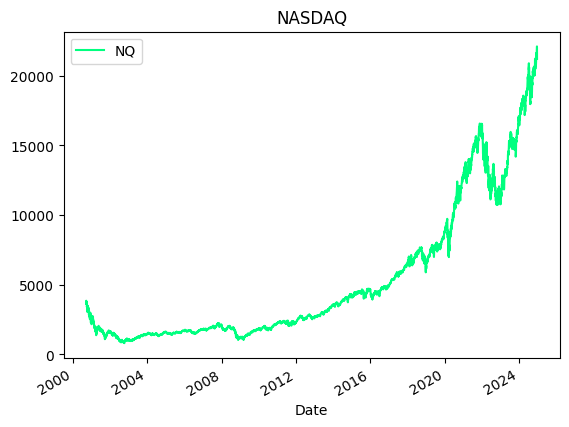

In [2]:
tickerData_nq = yf.Ticker('NQ=F')
data_nq = tickerData_nq.history(period='1d', start='2000-1-1', end='2024-12-19')
data_nq['Close'].plot(color = 'springgreen', label = 'NQ')
plt.title('NASDAQ')
plt.legend()
plt.show()

# Get VIX data

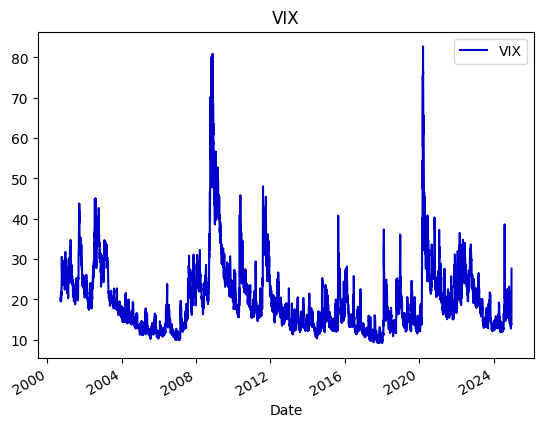

In [3]:
tickerData_vix = yf.Ticker('^VIX')
data_vix = tickerData_vix.history(period='1d', start='2000-09-18', end='2024-12-19')
data_vix['Close'].plot(color = 'mediumblue', label = 'VIX')
plt.title('VIX')
plt.legend()
plt.show()

# Get DXY (Dollar Index) data

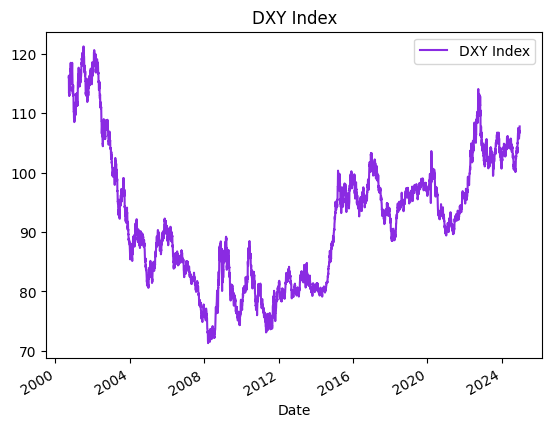

In [4]:
tickerData_dxy = yf.Ticker('DX=F')
data_dxy = tickerData_dxy.history(period='1d', start='2000-09-18', end='2024-12-19')
data_dxy['Close'].plot(color = 'blueviolet', label = 'DXY Index')
plt.title('DXY Index')
plt.legend()
plt.show()

# **Pre-proccessing and preparing data**

In [5]:
data_nq = data_nq.dropna()
data_nq = data_nq.drop(columns= ['Dividends', 'Stock Splits'])
data_nq

,Open,High,Low,Close,Volume
Date,,,,,
2000-09-18 00:00:00-04:00,3721.00,3785.50,3602.00,3653.50,72994
2000-09-19 00:00:00-04:00,3658.50,3817.00,3656.00,3804.00,70029
2000-09-20 00:00:00-04:00,3801.50,3874.00,3715.50,3853.00,78832
2000-09-21 00:00:00-04:00,3852.00,3874.00,3744.00,3765.00,70719
2000-09-22 00:00:00-04:00,3673.00,3780.00,3615.00,3776.00,55926
...,...,...,...,...,...
2024-12-12 00:00:00-05:00,21756.75,21772.50,21604.25,21651.25,510307
2024-12-13 00:00:00-05:00,21720.75,21908.00,21666.50,21795.75,639403
2024-12-16 00:00:00-05:00,21780.25,22152.50,21762.00,22110.25,482433


In [6]:
data_vix = data_vix.rename(columns = {'Close': 'VIX Close'})
data_vix = data_vix.drop(columns= ['Open', 'High', 'Low', 'Volume','Dividends', 'Stock Splits'])
data_vix

,VIX Close
Date,
2000-09-18 00:00:00-05:00,20.250000
2000-09-19 00:00:00-05:00,19.540001
2000-09-20 00:00:00-05:00,19.930000
2000-09-21 00:00:00-05:00,20.180000
2000-09-22 00:00:00-05:00,20.740000
...,...
2024-12-12 00:00:00-06:00,13.920000
2024-12-13 00:00:00-06:00,13.810000
2024-12-16 00:00:00-06:00,14.690000


In [7]:
data_dxy = data_dxy.rename(columns = {'Close': 'DXY Close'})
data_dxy = data_dxy.drop(columns= ['Open', 'High', 'Low', 'Volume','Dividends', 'Stock Splits'])
data_dxy

,DXY Close
Date,
2000-09-18 00:00:00-04:00,116.010002
2000-09-19 00:00:00-04:00,116.129997
2000-09-20 00:00:00-04:00,116.290001
2000-09-21 00:00:00-04:00,115.000000
2000-09-22 00:00:00-04:00,113.339996
...,...
2024-12-12 00:00:00-05:00,106.959000
2024-12-13 00:00:00-05:00,106.992996
2024-12-16 00:00:00-05:00,107.029999


# Calculation of the 100 MA (100 period Simple Moving Average)

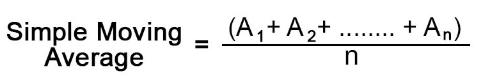

In [8]:
data_nq['SMA100'] = data_nq['Close'].rolling(window = 100).mean()
data_nq['SMA100'] = data_nq['SMA100'].fillna(0)

# Calculation of the RSI (14 periods)

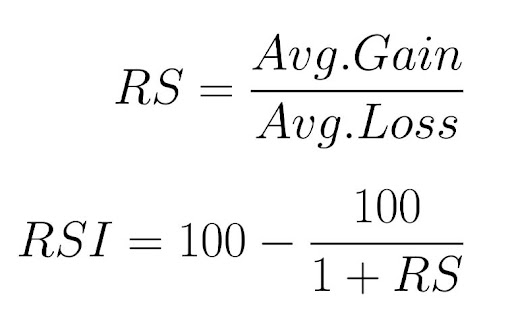

In [9]:
# Function to calculate RSI

def RSI(data_nq, period): 
    delta = data_nq['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    average_gain = gain.rolling(window = period).mean()
    average_loss = loss.rolling(window = period).mean()

    RS = average_gain / average_loss

    RSI_Calc = 100 - (100 / (1 + RS))

    return RSI_Calc

# Call the function to the 14 period RSI

data_nq['RSI'] = RSI(data_nq, 14)

In [10]:
data_nq

,Open,High,Low,Close,Volume,SMA100,RSI
Date,,,,,,,
2000-09-18 00:00:00-04:00,3721.00,3785.50,3602.00,3653.50,72994,0.000000,NaN
2000-09-19 00:00:00-04:00,3658.50,3817.00,3656.00,3804.00,70029,0.000000,NaN
2000-09-20 00:00:00-04:00,3801.50,3874.00,3715.50,3853.00,78832,0.000000,NaN
2000-09-21 00:00:00-04:00,3852.00,3874.00,3744.00,3765.00,70719,0.000000,NaN
2000-09-22 00:00:00-04:00,3673.00,3780.00,3615.00,3776.00,55926,0.000000,NaN
...,...,...,...,...,...,...,...
2024-12-12 00:00:00-05:00,21756.75,21772.50,21604.25,21651.25,510307,20048.355098,69.595803
2024-12-13 00:00:00-05:00,21720.75,21908.00,21666.50,21795.75,639403,20074.280098,71.296713
2024-12-16 00:00:00-05:00,21780.25,22152.50,21762.00,22110.25,482433,20105.460098,74.550898


# Calculation of the VWAP (Volume-Weighted Average Price)

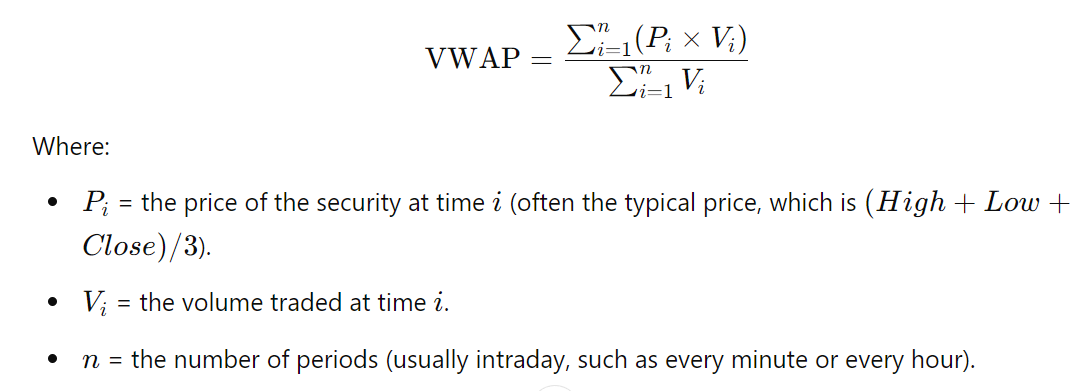

In [11]:
# Function to calculate VWAP 

def VWAP(data_nq):
    typical_price = (data_nq['Close'] + data_nq['High'] + data_nq['Low'])/3
    total_price = typical_price * data_nq['Volume']

    vwap_calc = total_price / data_nq['Volume']

    return vwap_calc

# Call the function to calculate VWAP

data_nq['VWAP'] = VWAP(data_nq)

In [12]:
# Count zeros in columns

data_nq.isin([0]).sum()

Open       0
High       0
Low        0
Close      0
Volume     5
SMA100    99
RSI        0
VWAP       0
dtype: int64

# Merge the Time Series

In [13]:
# Reset index 

data_nq = data_nq.reset_index()
data_vix = data_vix.reset_index()
data_dxy = data_dxy.reset_index()

In [14]:
# Convert date to datetime format   

data_nq["Date"] = pd.to_datetime(data_nq["Date"]).dt.tz_localize(None)
data_vix["Date"] = pd.to_datetime(data_vix["Date"]).dt.tz_localize(None)
data_dxy["Date"] = pd.to_datetime(data_dxy["Date"]).dt.tz_localize(None)

# Drop duplicates

data_nq = data_nq.drop_duplicates(subset="Date")
data_vix = data_vix.drop_duplicates(subset="Date")
data_dxy = data_dxy.drop_duplicates(subset="Date")

In [15]:
# Merge dataframes

data1 = pd.merge(data_nq, data_vix, on = 'Date', how = 'inner')
data = pd.merge(data1, data_dxy, on = 'Date', how = 'inner')
data

,Date,Open,High,Low,Close,Volume,SMA100,RSI,VWAP,VIX Close,DXY Close
0,2000-09-18,3721.00,3785.50,3602.00,3653.50,72994,0.000000,NaN,3680.333333,20.250000,116.010002
1,2000-09-19,3658.50,3817.00,3656.00,3804.00,70029,0.000000,NaN,3759.000000,19.540001,116.129997
2,2000-09-20,3801.50,3874.00,3715.50,3853.00,78832,0.000000,NaN,3814.166667,19.930000,116.290001
3,2000-09-21,3852.00,3874.00,3744.00,3765.00,70719,0.000000,NaN,3794.333333,20.180000,115.000000
4,2000-09-22,3673.00,3780.00,3615.00,3776.00,55926,0.000000,NaN,3723.666667,20.740000,113.339996
...,...,...,...,...,...,...,...,...,...,...,...
6092,2024-12-12,21756.75,21772.50,21604.25,21651.25,510307,20048.355098,69.595803,21676.000000,13.920000,106.959000
6093,2024-12-13,21720.75,21908.00,21666.50,21795.75,639403,20074.280098,71.296713,21790.083333,13.810000,106.992996
6094,2024-12-16,21780.25,22152.50,21762.00,22110.25,482433,20105.460098,74.550898,22008.250000,14.690000,107.029999
6095,2024-12-17,22115.00,22124.50,21942.25,22014.75,277298,20133.862598,70.529701,22027.166667,15.870000,106.663002


In [16]:
# Drop columns

data = data.drop(columns = ['Open', 'High', 'Low', 'Volume'])
data

,Date,Close,SMA100,RSI,VWAP,VIX Close,DXY Close
0,2000-09-18,3653.50,0.000000,NaN,3680.333333,20.250000,116.010002
1,2000-09-19,3804.00,0.000000,NaN,3759.000000,19.540001,116.129997
2,2000-09-20,3853.00,0.000000,NaN,3814.166667,19.930000,116.290001
3,2000-09-21,3765.00,0.000000,NaN,3794.333333,20.180000,115.000000
4,2000-09-22,3776.00,0.000000,NaN,3723.666667,20.740000,113.339996
...,...,...,...,...,...,...,...
6092,2024-12-12,21651.25,20048.355098,69.595803,21676.000000,13.920000,106.959000
6093,2024-12-13,21795.75,20074.280098,71.296713,21790.083333,13.810000,106.992996
6094,2024-12-16,22110.25,20105.460098,74.550898,22008.250000,14.690000,107.029999
6095,2024-12-17,22014.75,20133.862598,70.529701,22027.166667,15.870000,106.663002


In [17]:
data['SMA100'] = data['SMA100'].astype(float)
data['RSI'] = data['RSI'].astype(float)

# **Import datasets from other file**

# Complete the data in SMA100 and RSI columns (0 to 98 rows in 100 and 0 to 12 rows in RSI)

In [18]:
# Load the pickle files

df_SMA100 = pd.read_pickle('missing_data_SMA100.pkl')
df_SMA100 = df_SMA100.iloc[::-1]
df_SMA100 = df_SMA100.astype(float)
df_SMA100

,SMA
2000-09-18,78.5689
2000-09-19,78.5854
2000-09-20,78.5843
2000-09-21,78.5174
2000-09-22,78.5412
...,...
2001-02-01,62.6940
2001-02-02,62.4283
2001-02-05,62.1744
2001-02-06,61.9033


In [19]:
# Load the pickle files

df_RSI = pd.read_pickle('missing_data_RSI14.pkl')
df_RSI = df_RSI.iloc[::-1]
df_RSI = df_RSI.astype(float)
df_RSI

,RSI
2000-09-18,38.6362
2000-09-19,46.7829
2000-09-20,49.8991
2000-09-21,38.3458
2000-09-22,48.1067
2000-09-25,44.4962
2000-09-26,43.0454
2000-09-27,43.2774
2000-09-28,47.1427
2000-09-29,42.7363


# Embed the missing data into the main dataframe

In [20]:
# Embed df_RSI into the first 13 rows of the column 'RSI' in data

data.loc[data['RSI'].isna(), 'RSI'] = df_RSI['RSI'].values
data

,Date,Close,SMA100,RSI,VWAP,VIX Close,DXY Close
0,2000-09-18,3653.50,0.000000,38.636200,3680.333333,20.250000,116.010002
1,2000-09-19,3804.00,0.000000,46.782900,3759.000000,19.540001,116.129997
2,2000-09-20,3853.00,0.000000,49.899100,3814.166667,19.930000,116.290001
3,2000-09-21,3765.00,0.000000,38.345800,3794.333333,20.180000,115.000000
4,2000-09-22,3776.00,0.000000,48.106700,3723.666667,20.740000,113.339996
...,...,...,...,...,...,...,...
6092,2024-12-12,21651.25,20048.355098,69.595803,21676.000000,13.920000,106.959000
6093,2024-12-13,21795.75,20074.280098,71.296713,21790.083333,13.810000,106.992996
6094,2024-12-16,22110.25,20105.460098,74.550898,22008.250000,14.690000,107.029999
6095,2024-12-17,22014.75,20133.862598,70.529701,22027.166667,15.870000,106.663002


In [22]:
# Embed df_SMA100 into the first 99 rows of the column 'SMA100' in data

data.loc[data['SMA100'] == 0, 'SMA100'] = df_SMA100['SMA'].values
data

,Date,Close,SMA100,RSI,VWAP,VIX Close,DXY Close
0,2000-09-18,3653.50,78.568900,38.636200,3680.333333,20.250000,116.010002
1,2000-09-19,3804.00,78.585400,46.782900,3759.000000,19.540001,116.129997
2,2000-09-20,3853.00,78.584300,49.899100,3814.166667,19.930000,116.290001
3,2000-09-21,3765.00,78.517400,38.345800,3794.333333,20.180000,115.000000
4,2000-09-22,3776.00,78.541200,48.106700,3723.666667,20.740000,113.339996
...,...,...,...,...,...,...,...
6092,2024-12-12,21651.25,20048.355098,69.595803,21676.000000,13.920000,106.959000
6093,2024-12-13,21795.75,20074.280098,71.296713,21790.083333,13.810000,106.992996
6094,2024-12-16,22110.25,20105.460098,74.550898,22008.250000,14.690000,107.029999
6095,2024-12-17,22014.75,20133.862598,70.529701,22027.166667,15.870000,106.663002
